In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

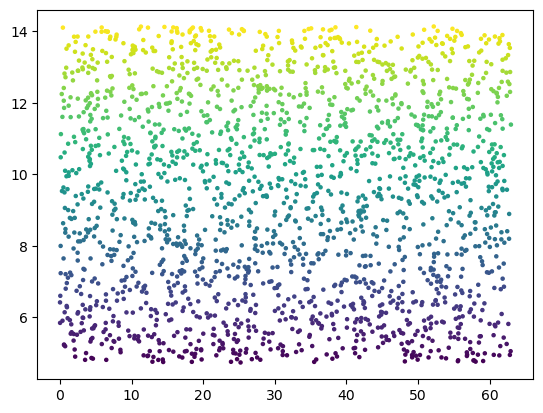

In [3]:
np.random.seed(42)
X, t = datasets.make_swiss_roll(2000,hole=False)
X[:, 1] *= 3
plt.scatter(X[:, 1],t, c=t,s =5, cmap = "viridis")

In [4]:
swiss_Y_dtne = pd.read_csv("../0_swiss/swiss_Y_dtne.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_umap = pd.read_csv("../0_swiss/swiss_Y_umap.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_tsne = pd.read_csv("../0_swiss/swiss_Y_tsne.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_mds = pd.read_csv("../0_swiss/swiss_Y_mds.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_dm = pd.read_csv("../0_swiss/swiss_Y_dm.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_phate = pd.read_csv("../0_swiss/swiss_Y_phate.csv", header= None, index_col=None).to_numpy(dtype='float32')
swiss_Y_heatgeo = pd.read_csv("../0_swiss/swiss_Y_heatgeo.csv", header= None, index_col=None).to_numpy(dtype='float32')

0 UMAP
1 tSNE
2 MDS
3 Diffusion Maps
4 PHATE
5 HeatGeo
6 DTNE


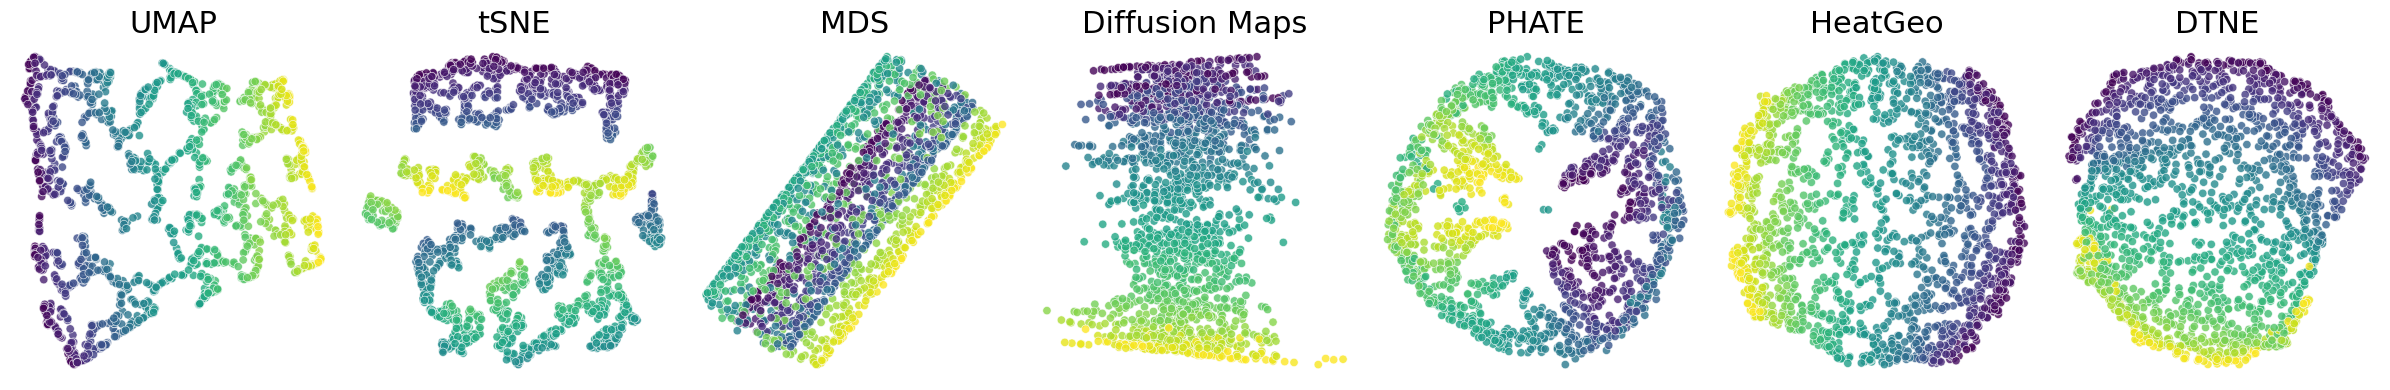

In [5]:
embedding = [swiss_Y_umap,swiss_Y_tsne,swiss_Y_mds,swiss_Y_dm,swiss_Y_phate,swiss_Y_heatgeo,swiss_Y_dtne]
names = ['UMAP','tSNE',"MDS",'Diffusion Maps','PHATE','HeatGeo','DTNE']

cmap = "viridis"
fig = plt.figure(figsize=(24, 4))

for i, name in enumerate(names):
    print(i,name)
    ax = fig.add_subplot(1, 7, i +1 )
    sns.scatterplot(x=embedding[i][:, 0], y=embedding[i][:, 1], hue=t, ax=ax, palette=cmap, alpha=0.8)
    ax.set_title(name, fontsize=22)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()
    ax.legend().remove()
plt.tight_layout()
# plt.savefig()
plt.savefig('./swiss_comp2.png', format='png', dpi=1000)

In [6]:
import phate
n_branch = 6
n_points = 500
gt_X, labels = phate.tree.gen_dla(n_branch=n_branch, branch_length=n_points, n_dim=10, sigma=0,seed=5) 

noise = np.random.normal(0, 2, gt_X.shape) # 2
tree_X = gt_X + noise
tree_labels = np.array([i // n_points for i in range(n_branch * n_points)])

In [7]:
tree_Y_dtne = pd.read_csv("./tree_Y_dtne.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_umap = pd.read_csv("./tree_Y_umap.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_tsne = pd.read_csv("./tree_Y_tsne.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_mds = pd.read_csv("./tree_Y_mds.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_dm = pd.read_csv("./tree_Y_dm.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_phate = pd.read_csv("./tree_Y_phate.csv", header= None, index_col=None).to_numpy(dtype='float32')
tree_Y_heatgeo = pd.read_csv("./tree_Y_heatgeo.csv", header= None, index_col=None).to_numpy(dtype='float32')

0 UMAP
1 tSNE
2 MDS
3 Diffusion Maps
4 PHATE
5 HeatGeo
6 DTNE


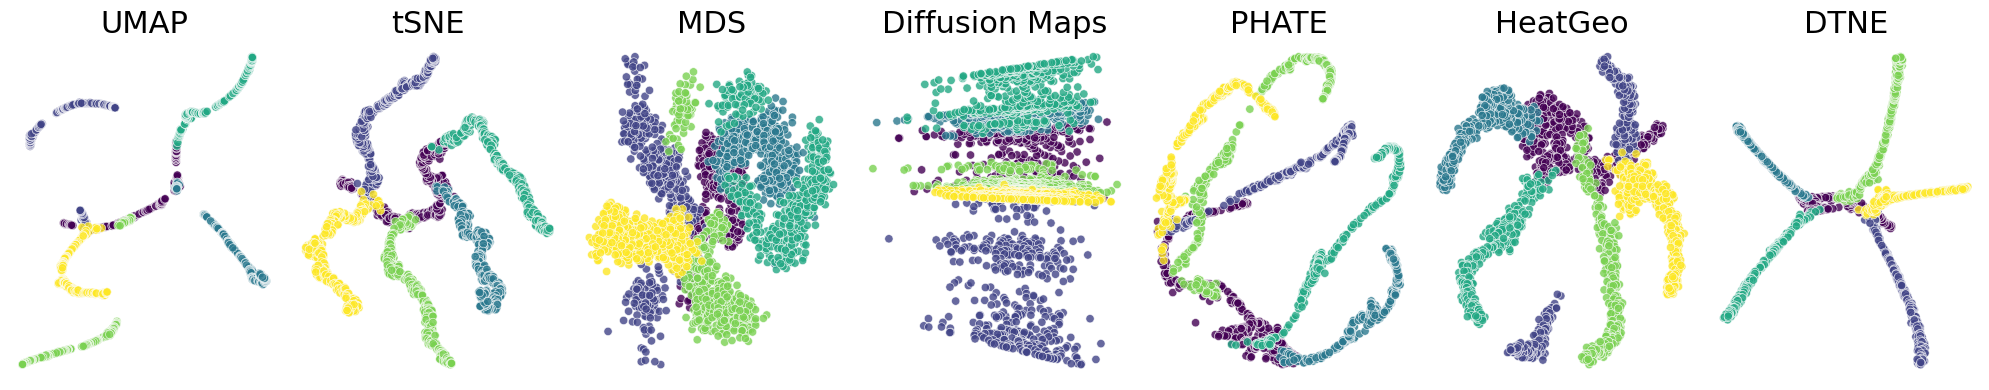

In [8]:
embedding = [tree_Y_umap,tree_Y_tsne,tree_Y_mds,tree_Y_dm,tree_Y_phate,tree_Y_heatgeo,tree_Y_dtne] # 
names = ['UMAP','tSNE', "MDS", 'Diffusion Maps','PHATE','HeatGeo','DTNE']

cmap = "viridis"
fig = plt.figure(figsize=(20, 4))

for i, name in enumerate(names):
    print(i,name)
    ax = fig.add_subplot(1, 7, i +1)
    sns.scatterplot(x=embedding[i][:, 0], y=embedding[i][:, 1], hue=tree_labels, ax=ax, palette=cmap, alpha=0.8)
    ax.set_title(name, fontsize=22)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()
    ax.legend().remove()
plt.tight_layout()
plt.savefig('./tree_comp2.png', format='png', dpi=1000)

In [9]:
from matplotlib import rc

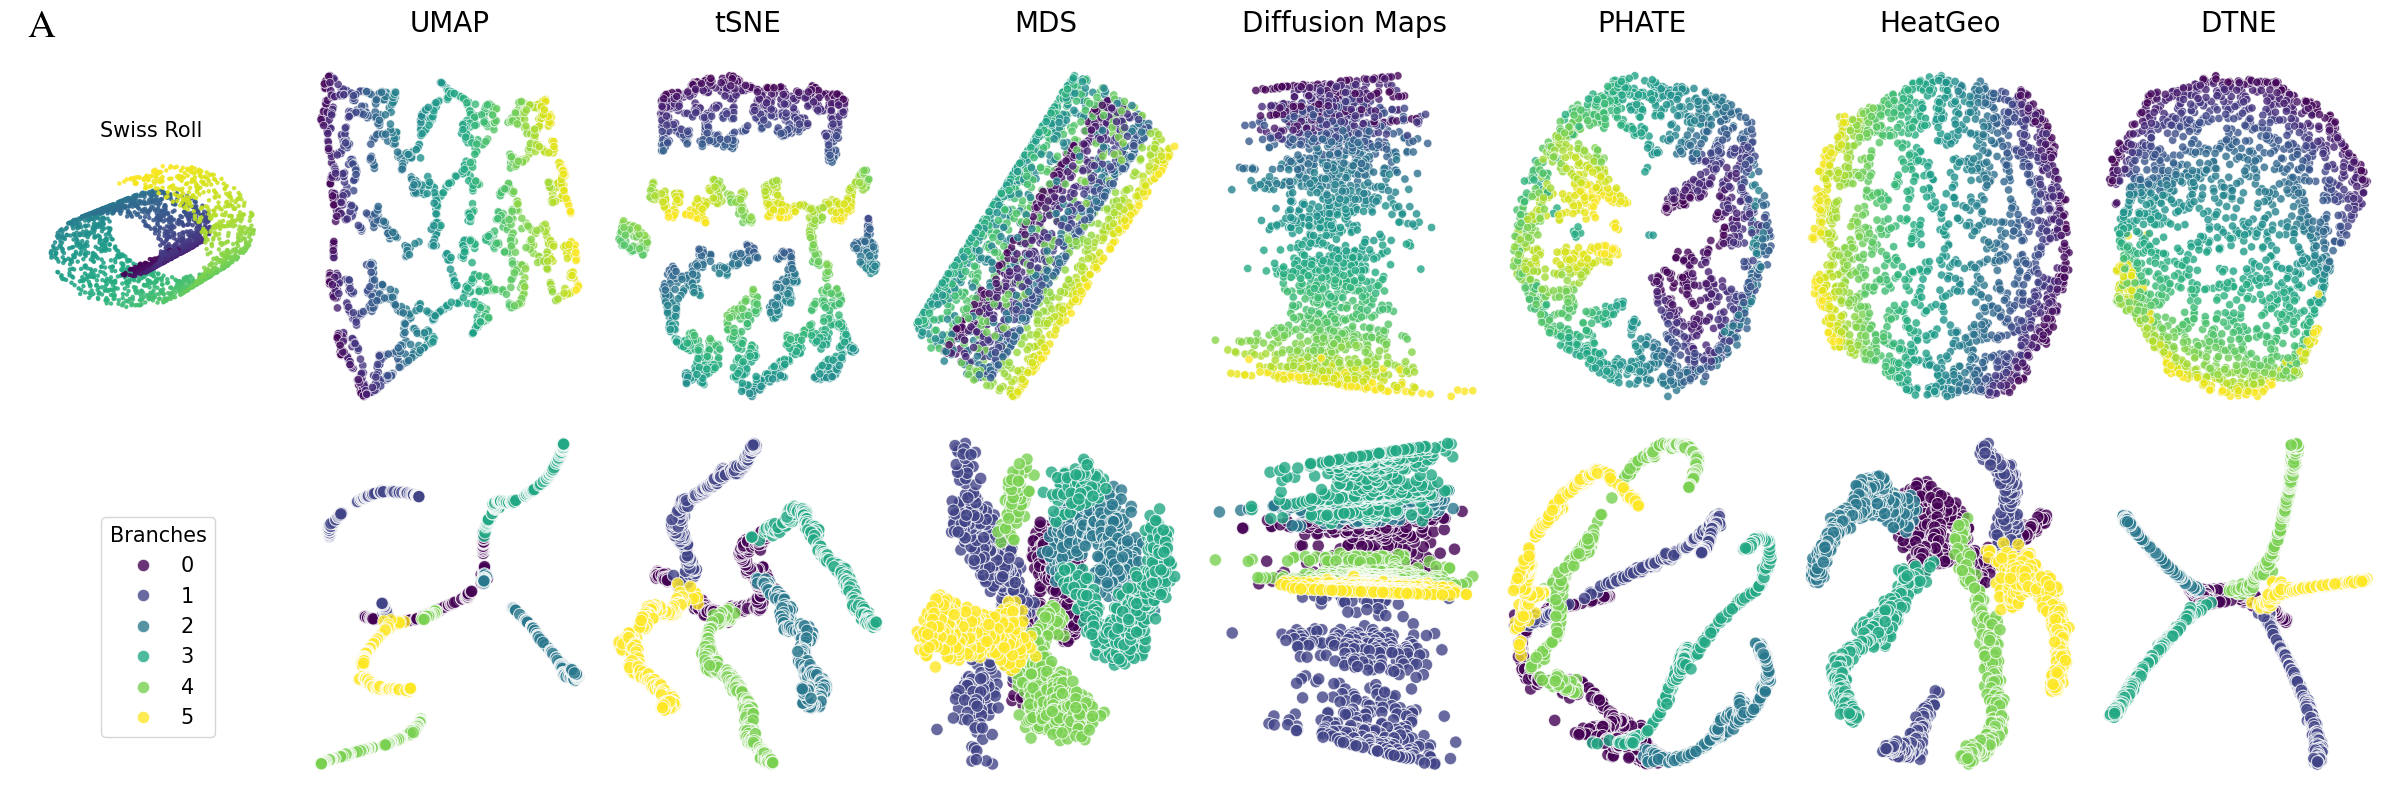

In [10]:
embedding = [[swiss_Y_umap,swiss_Y_tsne,swiss_Y_mds,swiss_Y_dm,swiss_Y_phate,swiss_Y_heatgeo,swiss_Y_dtne],
            [tree_Y_umap,tree_Y_tsne,tree_Y_mds,tree_Y_dm,tree_Y_phate,tree_Y_heatgeo,tree_Y_dtne]]
names = ['UMAP','tSNE','MDS','Diffusion Maps','PHATE','HeatGeo','DTNE']


fig= plt.figure(figsize=(24, 8))

for i in range(0, 16):
    if i < 8:
        if i == 0:
            ax = fig.add_subplot(2,8,1, projection='3d')
            ax.set_title('Swiss Roll',size=15,y=1.0, pad=-14)
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap="viridis", s=5,  alpha=0.8)
            ax.view_init(10, -70)
            ax.set_axis_off()
            
        else:
            ax = fig.add_subplot(2,8,i+1)
            ax.set_title(names[i-1],size=20,pad=20)
            sns.scatterplot(x=embedding[0][i-1][:, 0], y=embedding[0][i-1][:, 1], hue=t, ax=ax, palette=cmap, alpha=0.8)
            ax.axis("off")
            ax.set_axis_off()
            ax.legend().remove()
    else:
        if i == 8:
            pass
        else:
            j = i-9
            ax = fig.add_subplot(2,8,i+1)
            sns.scatterplot(x=embedding[1][j][:, 0], y=embedding[1][j][:, 1], hue=tree_labels, ax=ax,s=80, palette=cmap, alpha=0.8)
            ax.axis("off")
            ax.legend().remove()

# for ax, col in zip(ax[0], names):
#     ax.set_title(col,size=20,pad=1000)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=3, ncol=1, bbox_to_anchor=(0.04, 0.06), frameon=True, title= "Branches",fontsize = 15,title_fontsize=15 ) # label='Branches'
    
fig.tight_layout()

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
ax.text(-307, 75, 'A', fontsize=28, color='black') # style='italic'

# plt.savefig('./sim_comp.png', format='png', dpi=1000)
plt.savefig('./sim_comp.pdf', format='pdf', dpi=1000)